In [2]:
#Create data frames

#Top 10000 File
import pandas as pd

top_10000_file='./data/top_10000_1960-now.csv'

albums=pd.read_csv(top_10000_file,header=0)

albums.head(2)

#Events File
world_events_file='./data/copy_Events.csv'

events=pd.read_csv(world_events_file,header=0)

events.head(2)


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.048,0.0158,0.112000,0.408,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.149,0.0142,0.000021,0.237,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."


In [38]:
############# Profiling and Transformation section ############################

#***************************** 'Albums' transformation ***************************************

#change 'album release date' column to release_date
#albums=albums.rename(columns={'Album Release Date':'release_date'})

#albums.head(1)

#show dates in ascending order 
#albums.sort_values(['release_date'],ascending=True)

#show blank rows
#albums.loc[albums.release_date.isna()]

#drop blank rows
#albums.dropna(subset=['release_date'],inplace=True)

#show datatypes in 'albums'
#print(albums.dtypes)

#change 'release_date' object to a datetime object
# 'errors=coerce' will change any bad date values to 'NaT' which means 'Not a Time'
#albums['release_date']=pd.to_datetime(albums['release_date'],format='%Y-%m-%d',errors='coerce')

# Add 'album_year' column to top 10000 file
#albums['album_year']=albums['release_date'].dt.year

#Show updated dataframe with new column
#albums.sort_values(['release_date'],ascending=True)

#*************************************** 'Events' transformation *****************************
#show datatypes in 'events'
#print(events.dtypes)


Track URI                       object
Track Name                      object
Artist URI(s)                   object
Artist Name(s)                  object
Album URI                       object
Album Name                      object
Album Artist URI(s)             object
Album Artist Name(s)            object
release_date            datetime64[ns]
Album Image URL                 object
Disc Number                      int64
Track Number                     int64
Track Duration (ms)              int64
Track Preview URL               object
Explicit                          bool
Popularity                       int64
ISRC                            object
Added By                        object
Added At                        object
Artist Genres                   object
Danceability                   float64
Energy                         float64
Key                            float64
Loudness                       float64
Mode                           float64
Speechiness              

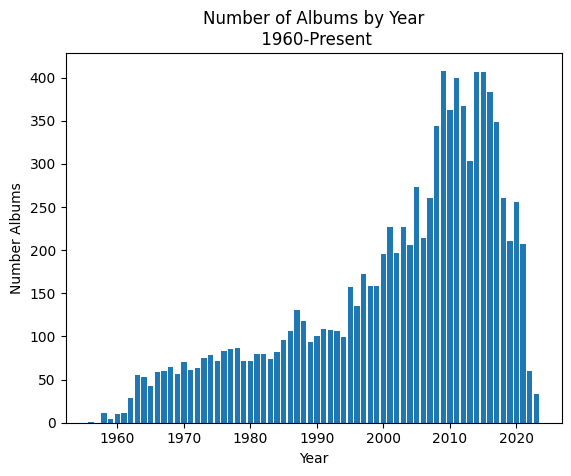

In [48]:
################## Create Visuals ################

#********** Number of Albums by Year #########
import matplotlib.pyplot as plt

#Create a variable to hold a count of unique album years(value_counts), then sort in ascending order (sort_index)
album_count=albums['album_year'].value_counts().sort_index()

#Create the bar chart with 'album_count.index' for the x axis and album_count.values for the Y axis
plt.bar(album_count.index,album_count.values)

# Add a title to the chart
plt.title("Number of Albums by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number Albums')

#Show the chart
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

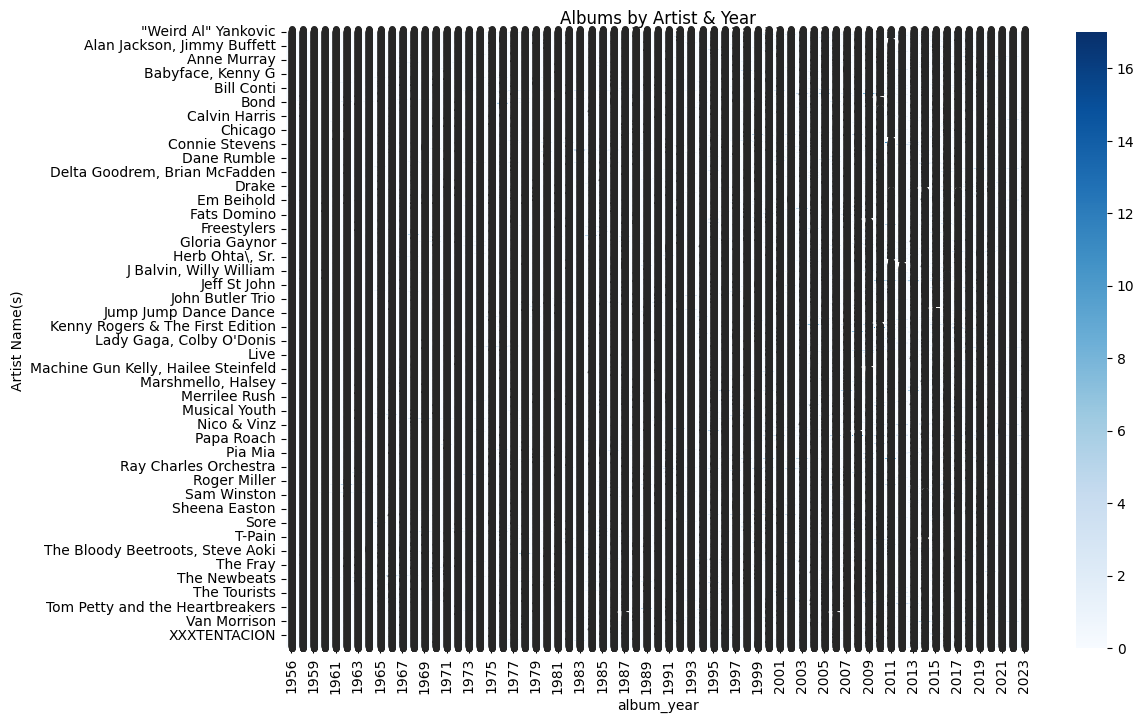

In [66]:
#Show number of albums by artist and year
#albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count()
#albums_per_artist

import seaborn as sns

#Count the number of albums by artist and year, relabel the index to be 'record_count"
#albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).size().reset_index(name='record_count')
albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count().reset_index(name='record_count')

#Heatmap
plt.figure(figsize=(12,8))

#Create a pivot table (pivot_table()), this forms the 'shape' of  heatmap

#heatmap_data = albums_per_artist.pivot_table(index='Artist',columns='Year',values='record_count',aggfunc='sum',fill_value=0)
heatmap_data = albums_per_artist.pivot_table(index='Artist Name(s)',columns='album_year',values='record_count',aggfunc='sum',fill_value=0)

#Set the attributes of the heatmap and create the map
sns.heatmap(heatmap_data,annot=True,cmap='Blues',fmt='d')

plt.title('Albums by Artist & Year')

plt.xlabel('album_year')
plt.ylabel('Artist Name(s)')

plt.show
